In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

## Book Name: 
   * Mastering Machine Learning with scikit-learn by Gaving Hackeling!
   
   
<a href='https://archive.ics.uci.edu/ml/datasets/Wine'> Download Dataset from here ! </a>

In [2]:
winedata = pd.read_csv('Winequality-red.csv')

In [3]:
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
winedata.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127863 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127863 missing from current font.
  font.set_text(s, 0, flags=flags)


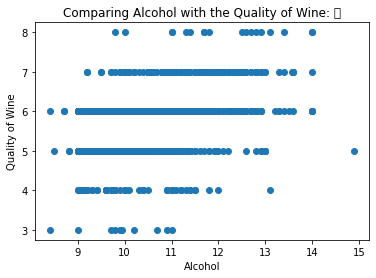

In [6]:
plt.scatter(x=winedata['alcohol'], y=winedata['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality of Wine')
plt.title(f'Comparing Alcohol with the Quality of Wine: 🍷')
plt.show()

<AxesSubplot:>

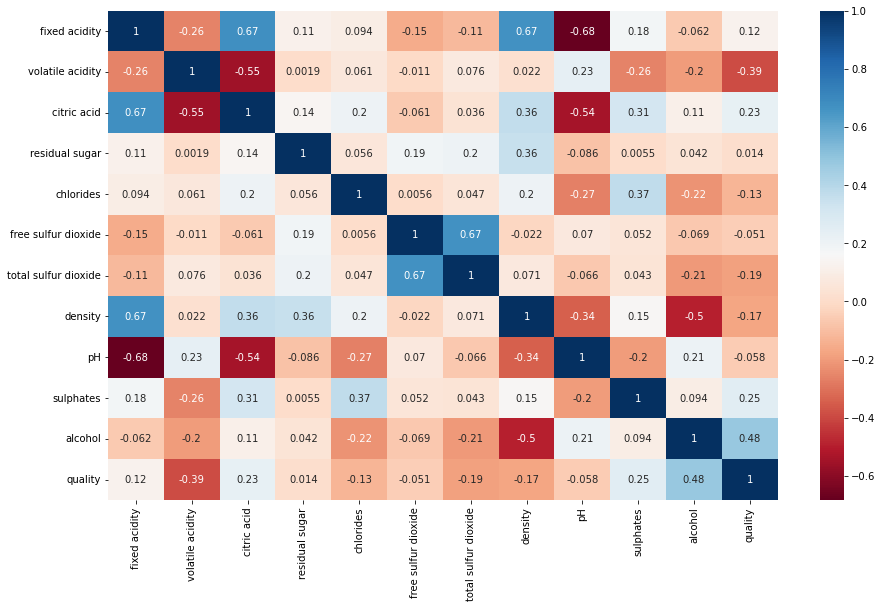

In [7]:
plt.figure(figsize=(15,9))
sns.heatmap(winedata.corr(), annot=True, cmap='RdBu')

In [8]:
winemodel = LinearRegression()

In [9]:
X = winedata.iloc[:,:-1]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
Y = winedata['quality']
Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=42)

# random state: Always get the same output the first time you make the split.

<a href='https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn'> Random state (Pseudo-random number) in Scikit learn </a>

In [12]:
winemodel.fit(X_train, y_train)

LinearRegression()

In [13]:
Y_prediction = winemodel.predict(X_train)
Y_prediction

array([6.35882698, 5.9774259 , 5.66887262, ..., 5.00667598, 6.64967023,
       6.78087735])

In [14]:
print('R-squared:', winemodel.score(X_train, y_train))

R-squared: 0.36119824413213164


In [15]:
scores = cross_val_score(winemodel, X, Y, cv=5)
print(scores)
print(scores.mean())

[0.13200871 0.31858135 0.34955348 0.369145   0.2809196 ]
0.2900416288421962


In [16]:
winemodel.fit(X_test, y_test)

LinearRegression()

In [17]:
Y_prediction_test = winemodel.predict(X_test)

In [18]:
Y_prediction_test

array([5.36582081, 4.99886839, 5.72409742, 5.41880123, 5.69700264,
       5.22552106, 5.06894157, 5.03412597, 5.84831204, 5.609089  ,
       6.19159643, 5.1493529 , 5.57423686, 5.24065778, 5.47799124,
       6.45531313, 5.114407  , 5.6357616 , 6.73050128, 5.41306287,
       5.32168388, 5.21182014, 5.800703  , 6.33148855, 5.29984332,
       5.41088434, 6.42672992, 5.26862724, 5.34856487, 6.35170154,
       5.25390594, 5.48215809, 5.82018418, 5.3969931 , 5.38997609,
       5.05351683, 6.24950823, 5.67287285, 5.68841122, 6.15534364,
       5.62144231, 5.27876308, 6.33976494, 5.23338282, 6.12114615,
       5.8775214 , 6.56537006, 5.71045633, 5.06957219, 5.53365195,
       5.39998432, 5.22633376, 5.48860085, 6.32023145, 4.91883614,
       5.08123684, 6.03852153, 5.57583389, 5.79955221, 5.18352841,
       5.6282526 , 6.01968453, 5.29551421, 5.33117705, 6.47415687,
       5.43701368, 6.40223153, 5.15819969, 6.44189182, 5.30821693,
       6.33356412, 4.73691193, 5.94070531, 5.7246436 , 6.14700

In [19]:
print('R-squared:', winemodel.score(X_test, y_test))

R-squared: 0.37213414111714527


In [20]:
y_test = y_test.reset_index(drop=True)
for i, pred in enumerate(Y_prediction_test):
            print(f' Actual: {y_test[i]} & Prediction: {pred}')

 Actual: 6 & Prediction: 5.36582081433259
 Actual: 5 & Prediction: 4.998868391213751
 Actual: 6 & Prediction: 5.724097418569524
 Actual: 5 & Prediction: 5.418801225732942
 Actual: 6 & Prediction: 5.69700263714369
 Actual: 5 & Prediction: 5.225521059796694
 Actual: 5 & Prediction: 5.068941574079279
 Actual: 5 & Prediction: 5.034125973372543
 Actual: 5 & Prediction: 5.848312043356742
 Actual: 6 & Prediction: 5.609088998020795
 Actual: 7 & Prediction: 6.1915964310592315
 Actual: 3 & Prediction: 5.149352901865491
 Actual: 5 & Prediction: 5.574236863067323
 Actual: 5 & Prediction: 5.240657775041871
 Actual: 6 & Prediction: 5.477991241237358
 Actual: 7 & Prediction: 6.455313126221235
 Actual: 5 & Prediction: 5.114407000089759
 Actual: 7 & Prediction: 5.635761600242688
 Actual: 8 & Prediction: 6.730501280317789
 Actual: 5 & Prediction: 5.413062869927018
 Actual: 5 & Prediction: 5.32168387794032
 Actual: 6 & Prediction: 5.211820140229662
 Actual: 5 & Prediction: 5.800702999631444
 Actual: 6 & 

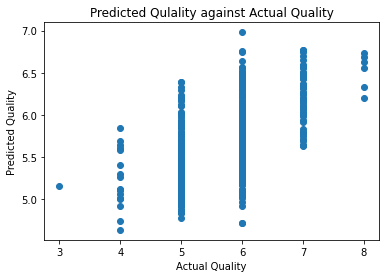

In [21]:
plt.scatter(x=y_test, y=Y_prediction_test)
plt.ylabel('Predicted Quality')
plt.xlabel('Actual Quality')
plt.title('Predicted Qulality against Actual Quality')
plt.show()

In [22]:
#Done